# loading data

In [35]:
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sna
df = pd.read_csv('/Users/udaysinghshekhawat/Documents/NIFTY500_dataset/Dataset/003_HDFCBANK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,214.449997,214.899994,209.750000,213.425003,197.498611,3514998
1,2012-01-03,215.699997,220.449997,215.000000,219.574997,203.189667,3439238
2,2012-01-04,220.949997,222.475006,215.425003,221.649994,205.109802,4871478
3,2012-01-05,222.000000,223.350006,220.149994,221.824997,205.271774,3380606
4,2012-01-06,220.500000,228.574997,219.475006,226.649994,209.736694,3977222
...,...,...,...,...,...,...,...
2460,2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1434.125488,2352549
2461,2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1444.010498,2725339
2462,2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1437.140259,3834351
2463,2021-12-30,1458.500000,1466.849976,1445.000000,1461.500000,1444.702393,3607959


# Data Preprocessing


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Exploratory Data Analysis (EDA)

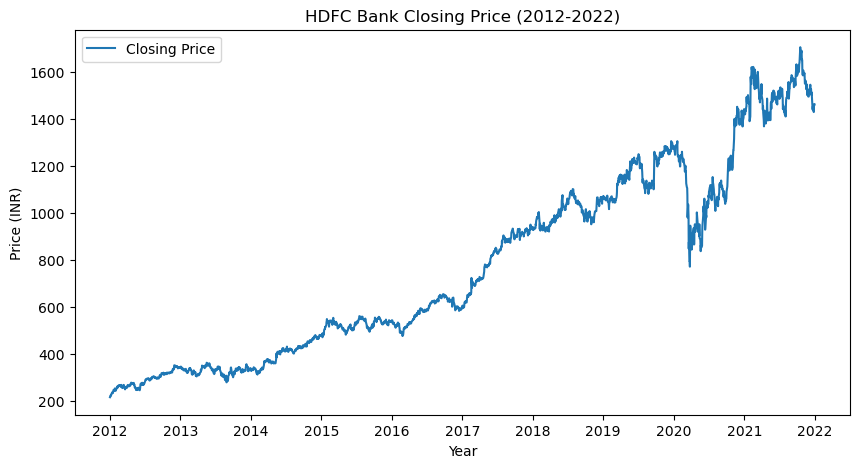

count    2465.000000
mean      774.626217
std       401.962979
min       214.449997
25%       411.200012
50%       643.549988
75%      1069.974976
max      1705.000000
Name: Open, dtype: float64


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Open'], label='Closing Price')
plt.title('HDFC Bank Closing Price (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


print(df['Open'].describe())


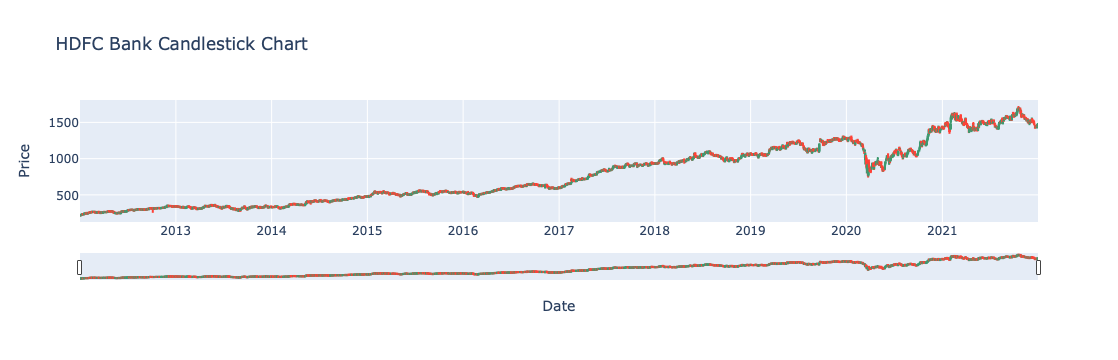

In [37]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])])

fig.update_layout(title='HDFC Bank Candlestick Chart',
                  xaxis_title='Date', yaxis_title='Price')

fig.show()

# Daily Returns Analysis

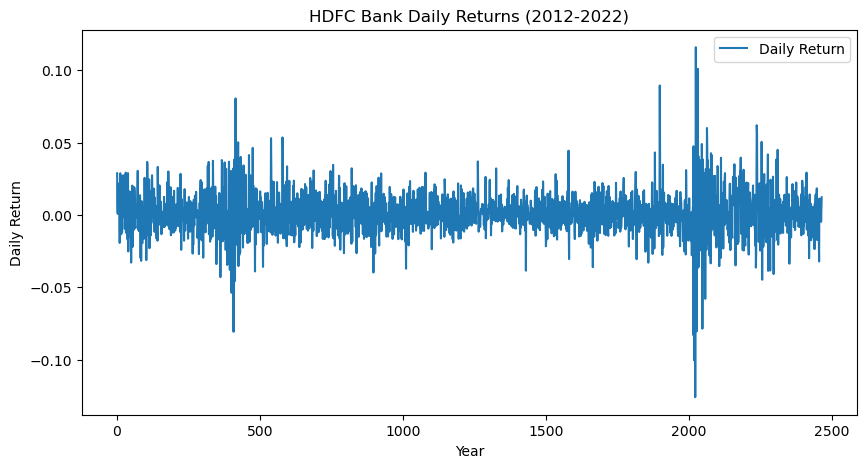

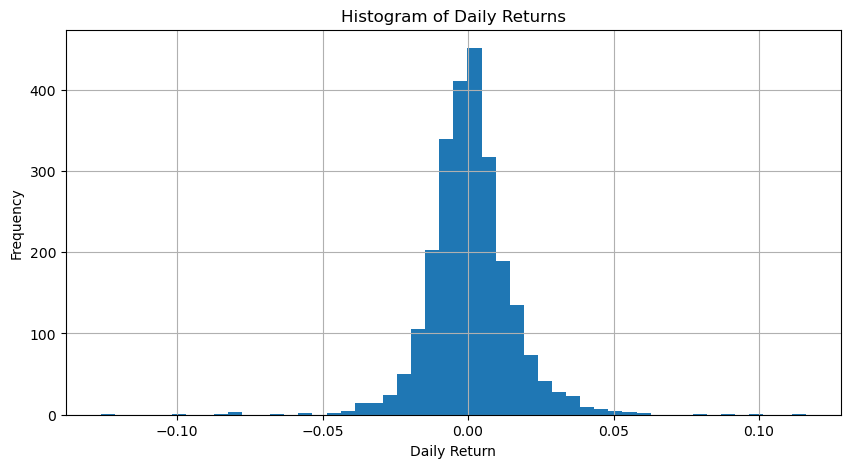

In [6]:

df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('HDFC Bank Daily Returns (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

df['Daily Return'].hist(bins=50, figsize=(10, 5))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


# Risk Metrics Calculation

In [13]:

volatility = df['Daily Return'].std()
print(f'Volatility (Standard Deviation): {volatility}')

var_95 = df['Daily Return'].quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level: {var_95}')

risk_free_rate = 0.04 / 252
sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / volatility
print(f'Sharpe Ratio: {sharpe_ratio}')


Volatility (Standard Deviation): 0.014630771982033951
Value at Risk (VaR) at 95% confidence level: -0.019093458163660287
Sharpe Ratio: 0.050190214590299244


# Correlation with Market (Beta Calculation)

In [26]:
hdfc_df = pd.read_csv(r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\003_HDFCBANK.csv')
hdfc_df['Date'] = pd.to_datetime(hdfc_df['Date'])
hdfc_df.set_index('Date', inplace=True)
hdfc_df['Daily Return'] = hdfc_df['Close'].pct_change()
nifty_df = pd.read_csv(r'C:\Users\USER\Downloads\archive\NIFTY 50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df.set_index('Date', inplace=True)
nifty_df['Daily Return'] = nifty_df['Close'].pct_change()
aligned_data = hdfc_df['Daily Return'].align(nifty_df['Daily Return'], join='inner')
cov_matrix = aligned_data[0].cov(aligned_data[1])
market_var = aligned_data[1].var()
beta = cov_matrix / market_var
print(f'Beta of HDFC Bank: {beta}')


Beta of HDFC Bank: 1.0116992626334893


# Rolling Statistics

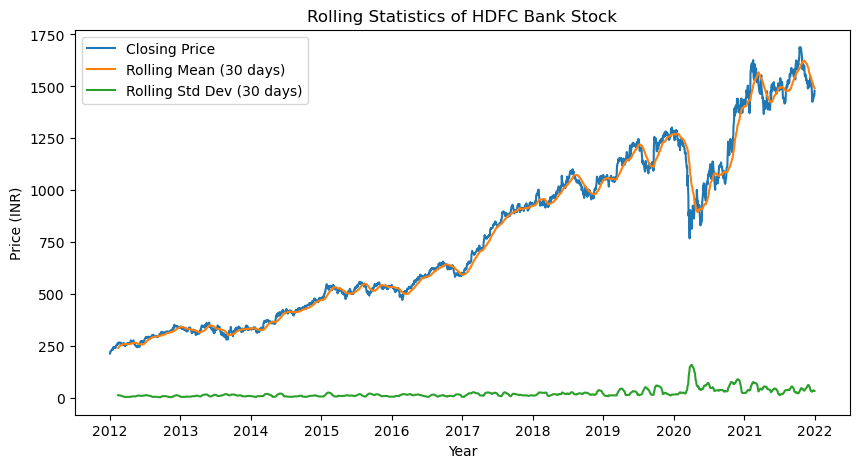

In [27]:
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std Dev'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Rolling Mean'], label='Rolling Mean (30 days)')
plt.plot(df['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Rolling Statistics of HDFC Bank Stock')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


In [28]:
df.to_csv('HDFC_Risk_Analysis.csv')

In [27]:
!pip install mplfinance



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']].values)

# Create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Predict and inverse transform
predicted_price = model.predict(X)
predicted_price = scaler.inverse_transform(predicted_price)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[time_step+1:], df['Close'][time_step+1:], label='Actual Price')
plt.plot(df.index[time_step+1:], predicted_price, label='Predicted Price')
plt.title('HDFC Bank Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
